Comparison of QR DMD to Zhang et al. Online Dynamic Mode Decomposition for Time-Varying Systems

- https://epubs.siam.org/doi/abs/10.1137/18M1192329?journalCode=sjaday

using their data & code

https://github.com/haozhg/odmd

In [409]:
%run fDMD_functions.ipynb

from scipy.integrate import odeint
from odmd import OnlineDMD
from odmd import WindowDMD
import time
import matplotlib.pyplot as plt

Njihovo

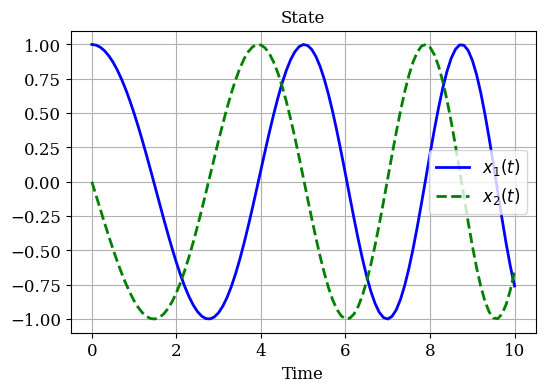

In [410]:
## prepisano iz njihovog

# define dynamics
epsilon = 1e-1
def dyn(x, t):
    x1, x2 = x
    dxdt = [(1+epsilon*t)*x2, -(1+epsilon*t)*x1]
    return dxdt

# integrate from initial condition [1,0]
tspan = np.linspace(0, 10, 101)
dt = 0.1
x0 = [1, 0]
xsol = odeint(dyn, x0, tspan).T
# extract snapshots
x, y = xsol[:, :-1], xsol[:, 1:]
t = tspan[1:]
# true dynamics, true eigenvalues
n, m = len(x[:, 0]), len(x[0, :])
A = np.empty((n, n, m))
evals = np.empty((n, m), dtype=complex)
for k in range(m):
    A[:, :, k] = np.array([[0, (1+epsilon*t[k])], [-(1+epsilon*t[k]), 0]])
    evals[:, k] = np.linalg.eigvals(A[:, :, k])

# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'b-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'g--', linewidth=2.0,  label='$x_2(t)$')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid()
plt.show()


#####################################################################################################################################
#   u x i u y su spremljeni podaci. evals su prave sv vrijednosti od A

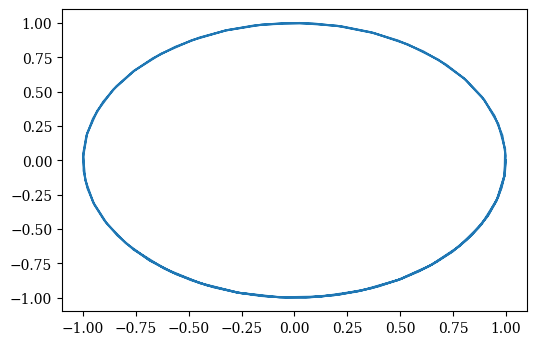

In [411]:
#rjesenja su na jedinicnoj kruznici
plt.plot(xsol[0,:], xsol[1,:])

In [412]:
q = 10 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x[:, :q], y[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x[:, k], y[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Online DMD, weighting = 1, time = 0.04874539375305176 secs


In [413]:
Lambda, Z = odmd.computemodes()

In [414]:
Lambda
Z

array([[ 0.71071962+0.j        ,  0.71071962-0.j        ],
       [-0.01257925+0.70336291j, -0.01257925-0.70336291j]])

Nase

In [415]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x[:,:q], y[:,:q])
start_nas = time.time()
for k in range(q, m):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x[:,k],y[:,k]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

time:  0.24902868270874023 sec


In [416]:
np.allclose(Q.T@Q, np.eye(Q.shape[1], Q.shape[1]))

True

[0. 0.]


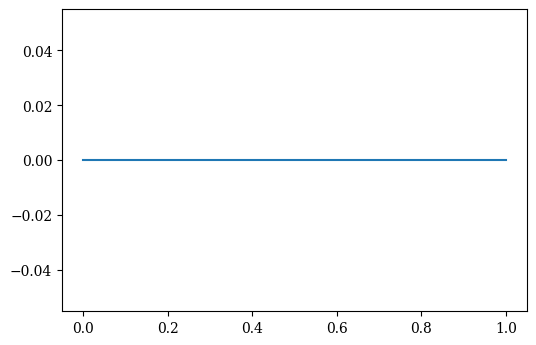

In [417]:
plt.plot(r) ### ispravljeno - dobijem mali r! Do sada je bio veliki..
print(r)

In [418]:
print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

## razliciti modovi - radimo istu stvar..

## uzeti i podijeliti hadamardovo 
        # trebaju biti kolinearni s kompleksnim brojem.. - provjeriti.. 
print(Z_nas/Z) #da, kolinearni su s kompleksnim brojem.
np.linalg.norm(-0.69894563-0.71517481j), np.linalg.norm(-0.69894563+0.71517481j) #norma = 1... - OK

Our eigs
[0.98848465+0.14945306j 0.98848465-0.14945306j]
Zhang eigs
[0.98848465+0.14945306j 0.98848465-0.14945306j]
Our modes
[[ 0.71071962+0.j          0.71071962-0.j        ]
 [-0.01257925+0.70336291j -0.01257925-0.70336291j]]
Zhang modes
[[ 0.71071962+0.j          0.71071962-0.j        ]
 [-0.01257925+0.70336291j -0.01257925-0.70336291j]]
[[1.+0.00000000e+00j 1.+0.00000000e+00j]
 [1.+1.02319876e-15j 1.-1.02319876e-15j]]


(1.0000000012773165, 1.0000000012773165)

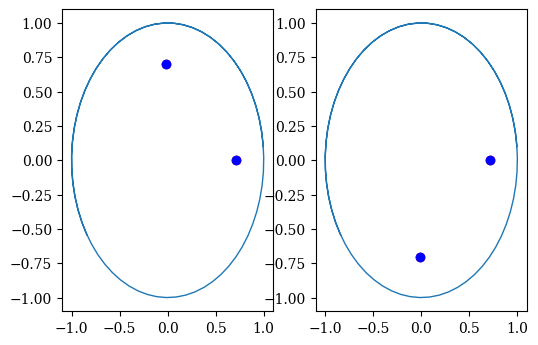

In [419]:
plt.subplot(1, 2, 1)
plt.plot(np.real(Z[:,0]), np.imag(Z[:,0]), 'o', label="zhang", color="r")
plt.plot(np.real(Z_nas[:,0]), np.imag(Z_nas[:,0]),'o', label="mi", color="b")
plt.plot(np.cos(t), np.sin(t), linewidth=1)


plt.subplot(1, 2, 2)
plt.plot(np.real(Z[:,1]), np.imag(Z[:,1]), 'o', label="zhang", color="r")
plt.plot(np.real(Z_nas[:,1]), np.imag(Z_nas[:,1]), 'o', label="mi", color="b")
plt.plot(np.cos(t), np.sin(t), linewidth=1)


plt.show()

In [420]:
#koje modove dobijem ako odmah ubacim sve x i y?
start_nas_sve=time.time()
Z_nas_svi, Lambda_nas_svi, r, Q, L = fGEDMDQ_multiple_trajectories(x, y)
end_nas_sve=time.time()
print("time: ", end_nas_sve-start_nas_sve, "sec")

time:  0.002522706985473633 sec


In [421]:
print("Our batch modes", Z_nas_svi, sep="\n")
print("Our batch eigs", Lambda_nas_svi, sep="\n")

Our batch modes
[[ 0.71071962+0.j          0.71071962-0.j        ]
 [-0.01257925+0.70336291j -0.01257925-0.70336291j]]
Our batch eigs
[0.98848465+0.14945306j 0.98848465-0.14945306j]


In [422]:
indices=np.array([0,1]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x, Z_nas, indices, Lambda_nas, times)

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [423]:
#nas reconstruction za njihov dmd..
reconstructed_njihovo = DMD_reconstruction(x, Z, indices, Lambda, times)

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


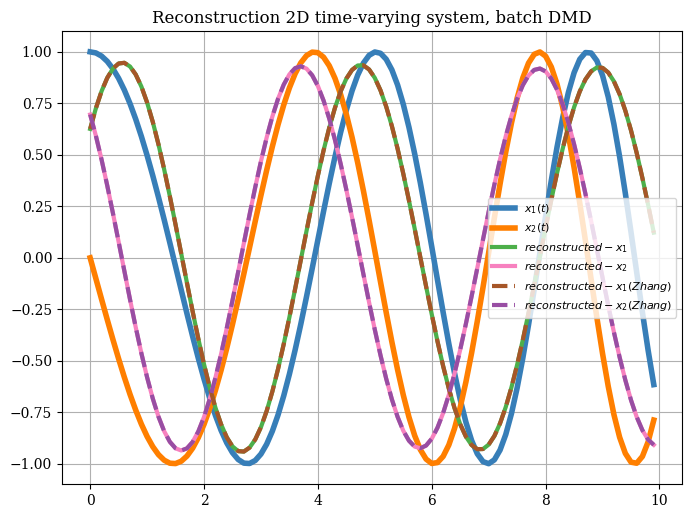

In [424]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
plt.figure(figsize=(8,6))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[:-1], x[0, :], linewidth=4,  label='$x_1(t)$', color=CB_color_cycle[0])
plt.plot(tspan[:-1], x[1, :], linewidth=4,  label='$x_2(t)$', color=CB_color_cycle[1])
plt.plot(tspan[:-1], reconstructed[0, :], linewidth=3,  label='$reconstructed - x_1$', color=CB_color_cycle[2])
plt.plot(tspan[:-1], reconstructed[1, :], linewidth=3,  label='$reconstructed - x_2$', color=CB_color_cycle[3])
plt.plot(tspan[:-1], reconstructed_njihovo[0, :], linewidth=3,  label='$reconstructed - x_1 (Zhang)$', color=CB_color_cycle[4], linestyle='dashed')
plt.plot(tspan[:-1], reconstructed_njihovo[1, :], linewidth=3,  label='$reconstructed - x_2 (Zhang)$', color=CB_color_cycle[5], linestyle='dashed')
plt.legend(loc='best', fontsize=8)
#plt.xlabel('Time', fontsize=12)
#plt.title('State', fontsize=12)
plt.title("Reconstruction 2D time-varying system, batch DMD")
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju

window

In [425]:
w = 20 #toliko uzmem za pocetak

times_init=[i for i in range(w+1)]; times=[w]


wdmd = WindowDMD(n, w)
wdmd.initialize(x[:,:w], y[:,:w]) # this is necessary for window DMD
start = time.time()
for k in range(w, m):
    wdmd.update(x[:, k], y[:, k])
    Lambda_w, Z_w = wdmd.computemodes()
    if k==w:
        reconstructed_njihovo_w = DMD_reconstruction(x[:,:w], Z_w, 'all', Lambda_w, times_init)
    else:
        reconstructed_njihovo_w = np.append(reconstructed_njihovo_w,DMD_reconstruction(x[:,k-w+1:k+1], Z_w, 'all', Lambda_w, times), axis=1)
end = time.time()

print("Window DMD, weighting = 1, time = " + str(end-start) + " secs")


Z_nas_w, Lambda_nas_w, r, Q, L = fGEDMDQ_multiple_trajectories(x[:,:w], y[:,:w])
start_nas = time.time()
for k in range(w, m):
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_discarding_snap(Q, L, 1)
    Z_nas_w, Lambda_nas_w, r, Q, L = fDMD_added_snap(np.bmat([x[:,k],y[:,k]]).T, Q, L)
    if k==w:
        reconstructed_nas_w = DMD_reconstruction(x[:,:w], Z_nas_w, 'all', Lambda_nas_w, times_init)
    else:
        reconstructed_nas_w = np.append(reconstructed_nas_w,DMD_reconstruction(x[:,k-w+1:k+1], Z_nas_w, 'all', Lambda_nas_w, times), axis=1)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

Window DMD, weighting = 1, time = 0.10329008102416992 secs
time:  0.3972809314727783 sec


In [426]:
#provjera je li Q i dalje ortg.

np.allclose(Q.T@Q, np.eye(4,4))

True

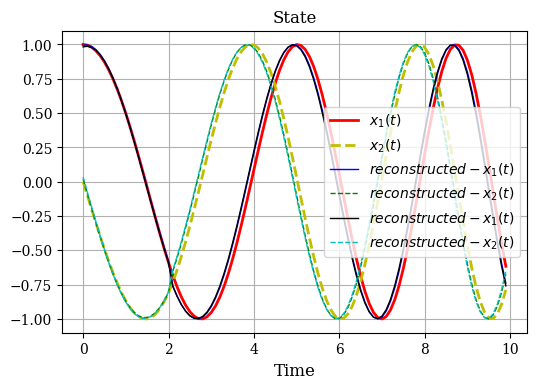

In [427]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[:-1], x[0, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan[:-1], x[1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[:-1], reconstructed_nas_w[0, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_nas_w[1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo_w[0, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo_w[1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju

############ PUNO BOLJE:) jako slican rezultat i za 5 (window size) i 20 (malo ljepsi pocetak kada ih je 20..)

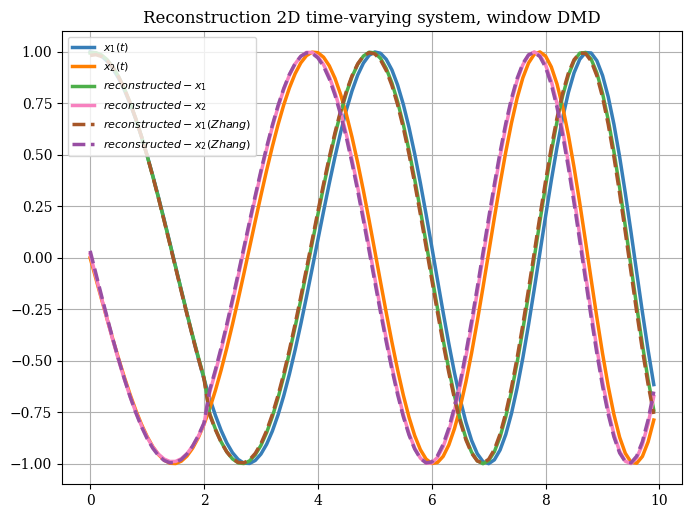

In [428]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
plt.figure(figsize=(8,6))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[:-1], x[0, :], linewidth=2.5,  label='$x_1(t)$', color=CB_color_cycle[0])
plt.plot(tspan[:-1], x[1, :], linewidth=2.5,  label='$x_2(t)$', color=CB_color_cycle[1])
plt.plot(tspan[:-1], reconstructed_nas_w[0, :], linewidth=2.5,  label='$reconstructed - x_1$', color=CB_color_cycle[2])
plt.plot(tspan[:-1], reconstructed_nas_w[1, :], linewidth=2.5,  label='$reconstructed - x_2$', color=CB_color_cycle[3])
plt.plot(tspan[:-1], reconstructed_njihovo_w[0, :], linewidth=2.5,  label='$reconstructed - x_1 (Zhang)$', color=CB_color_cycle[4], linestyle='dashed')
plt.plot(tspan[:-1], reconstructed_njihovo_w[1, :], linewidth=2.5,  label='$reconstructed - x_2 (Zhang)$', color=CB_color_cycle[5], linestyle='dashed')
plt.legend(loc='best', fontsize=8)
#plt.xlabel('Time', fontsize=12)
#plt.title('State', fontsize=12)
plt.title("Reconstruction 2D time-varying system, window DMD")
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju

STACKED

In [429]:
num_stack = 5
#num_stack=30
x_stacked = x[:,:(m-num_stack+1)]
y_stacked = y[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    x_stacked=np.vstack((x_stacked,x[:,i:(m-num_stack+1+i)]))
    y_stacked=np.vstack((y_stacked,y[:,i:(m-num_stack+1+i)]))

(n,m)=x_stacked.shape

In [434]:
n,m

(10, 96)

In [430]:
#je li dobro formirano..

print(x_stacked.shape, y_stacked.shape)

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(x[:2,k]==x_stacked[2*i:2*i+2,k-i]) and np.all(y[:2,k]==y_stacked[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, x[:2,k],x_stacked[2*i:2*i+2,k-i])

(10, 96) (10, 96)
True True True True 

In [431]:
q = 41 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x_stacked[:, :q], y_stacked[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x_stacked[:, k], y_stacked[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Lambda, Z = odmd.computemodes()

print(Lambda); print(Z)

Online DMD, weighting = 1, time = 0.013494253158569336 secs
[1.02350433+0.22519569j 1.02350433-0.22519569j 0.99981405+0.17763828j
 0.99981405-0.17763828j 0.85394309+0.0913267j  0.85394309-0.0913267j
 0.97718687+0.13690748j 0.97718687-0.13690748j 0.95242801+0.09564754j
 0.95242801-0.09564754j]
[[ 1.85682097e-01-0.21844562j  1.85682097e-01+0.21844562j
  -1.98242996e-01-0.23376112j -1.98242996e-01+0.23376112j
   4.15977818e-01+0.j          4.15977818e-01-0.j
   3.24697420e-01+0.j          3.24697420e-01-0.j
   4.42113194e-04-0.34375042j  4.42113194e-04+0.34375042j]
 [ 2.18418536e-01+0.18562938j  2.18418536e-01-0.18562938j
   2.33790391e-01-0.19825985j  2.33790391e-01+0.19825985j
  -1.15015088e-02+0.40317182j -1.15015088e-02-0.40317182j
  -1.17604071e-05+0.3246507j  -1.17604071e-05-0.3246507j
   3.43871535e-01+0.j          3.43871535e-01-0.j        ]
 [ 2.39239440e-01-0.18176523j  2.39239440e-01+0.18176523j
  -1.56681210e-01-0.26893321j -1.56681210e-01+0.26893321j
   3.55221076e-01+0.03799

In [432]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x_stacked[:,:q], y_stacked[:,:q], tol=1e-6) #isti rez ako dodam tol 1e-6, 
print(Q.shape)                                                                                  #ako stavim tol = 1e-3 malo losiji rez
start_nas = time.time()
for k in range(q, m):
    _,_,_,Q,L = fDMD_discarding_snap(Q, L, 1)
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x_stacked[:,k],y_stacked[:,k]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

## razliciti modovi - radimo istu stvar..

(41, 20)
time:  0.3211781978607178 sec
Our eigs
[-0.73873514+0.j         -0.84160082+0.j          1.03021598+0.24336483j
  1.03021598-0.24336483j  1.00324199+0.19850476j  1.00324199-0.19850476j
  0.97757567+0.15891422j  0.97757567-0.15891422j  0.94952344+0.11868232j
  0.94952344-0.11868232j]
Zhang eigs
[1.02350433+0.22519569j 1.02350433-0.22519569j 0.99981405+0.17763828j
 0.99981405-0.17763828j 0.85394309+0.0913267j  0.85394309-0.0913267j
 0.97718687+0.13690748j 0.97718687-0.13690748j 0.95242801+0.09564754j
 0.95242801-0.09564754j]
Our modes
[[ 6.65969373e-01+0.j         -5.90028516e-01+0.j
  -2.24390106e-01-0.16809171j -2.24390106e-01+0.16809171j
   2.14445418e-01-0.21272077j  2.14445418e-01+0.21272077j
   2.97336731e-05-0.32231324j  2.97336731e-05+0.32231324j
   3.44015368e-01+0.j          3.44015368e-01-0.j        ]
 [-1.84017710e-01+0.j         -8.28007247e-02+0.j
   1.68106121e-01-0.22442306j  1.68106121e-01+0.22442306j
   2.12700893e-01+0.21444138j  2.12700893e-01-0.21444138j
   

In [433]:
Q.T@Q

matrix([[ 9.99999835e-01,  3.41789693e-08, -1.38034653e-07,
         -3.53416670e-07,  8.24382841e-07,  4.81437361e-08,
         -1.47198079e-06,  1.47277099e-06, -2.67062984e-07,
         -7.68061839e-07, -6.89946235e-07, -2.32514625e-07,
          3.27179197e-07,  3.85194768e-07, -2.00867024e-07,
         -9.30590430e-08, -5.28472977e-08, -1.67914217e-07,
         -4.96929843e-07, -2.35017966e-06],
        [ 3.41789693e-08,  9.99999998e-01,  1.84484809e-08,
          8.26590384e-08, -2.18849633e-07, -4.11737482e-08,
          7.33171331e-07, -5.47950065e-07,  1.06601809e-07,
          4.25000273e-07,  3.06198380e-07,  5.62415241e-08,
         -8.21356935e-08, -1.51736597e-07,  2.07129307e-07,
          2.36769294e-07,  4.65551758e-08,  6.39793300e-08,
          1.12165189e-07,  1.30194707e-06],
        [-1.38034653e-07,  1.84484809e-08,  9.99999902e-01,
         -3.12265611e-07,  7.72044725e-07,  9.12907276e-08,
         -1.88882218e-06,  1.62174853e-06, -3.05857948e-07,
         -1.

In [400]:
print(np.allclose(Q.T@Q, np.eye(Q.shape[1])))
Q.T@Q #dosta gubi na ortogonalnosti.. zasto

False


matrix([[ 9.99999835e-01,  3.41789693e-08, -1.38034653e-07,
         -3.53416670e-07,  8.24382841e-07,  4.81437361e-08,
         -1.47198079e-06,  1.47277099e-06, -2.67062984e-07,
         -7.68061839e-07, -6.89946235e-07, -2.32514625e-07,
          3.27179197e-07,  3.85194768e-07, -2.00867024e-07,
         -9.30590430e-08, -5.28472977e-08, -1.67914217e-07,
         -4.96929843e-07, -2.35017966e-06],
        [ 3.41789693e-08,  9.99999998e-01,  1.84484809e-08,
          8.26590384e-08, -2.18849633e-07, -4.11737482e-08,
          7.33171331e-07, -5.47950065e-07,  1.06601809e-07,
          4.25000273e-07,  3.06198380e-07,  5.62415241e-08,
         -8.21356935e-08, -1.51736597e-07,  2.07129307e-07,
          2.36769294e-07,  4.65551758e-08,  6.39793300e-08,
          1.12165189e-07,  1.30194707e-06],
        [-1.38034653e-07,  1.84484809e-08,  9.99999902e-01,
         -3.12265611e-07,  7.72044725e-07,  9.12907276e-08,
         -1.88882218e-06,  1.62174853e-06, -3.05857948e-07,
         -1.

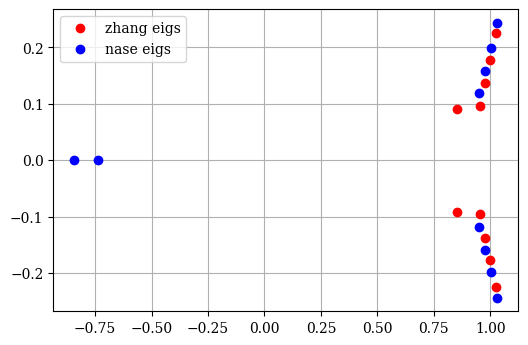

In [401]:
plt.plot(np.real(Lambda), np.imag(Lambda), 'o', color="r", label="zhang eigs")
plt.plot(np.real(Lambda_nas), np.imag(Lambda_nas), 'o', color="b", label="nase eigs")
plt.grid()
plt.legend()
plt.show()

In [402]:
indices=np.array([i for i in range (Z_nas.shape[1])]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x_stacked, Z_nas, indices, Lambda_nas, times)

indices=np.array([i for i in range (Z.shape[1])]); times=[i for i in range(m)]
reconstructed_njihovo = DMD_reconstruction(x_stacked, Z, indices, Lambda, times)

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


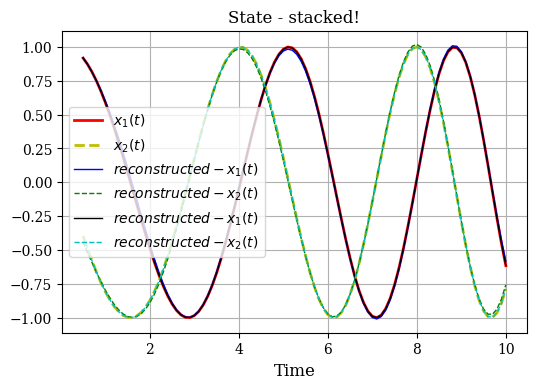

In [403]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[num_stack:], x_stacked[-2, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan[num_stack:], x_stacked[-1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[num_stack:], reconstructed[-2, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[num_stack:], reconstructed[-1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[num_stack:], reconstructed_njihovo[-2, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[num_stack:], reconstructed_njihovo[-1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State - stacked!', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju 

###BOLJI REZULTATI SA STACKED!!

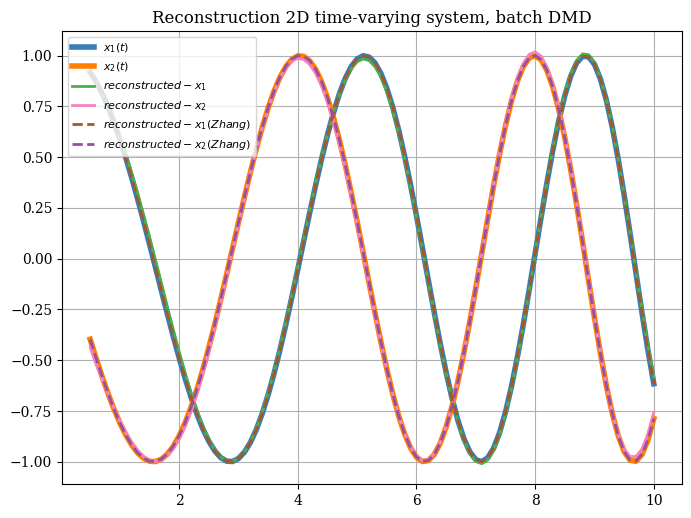

In [408]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
plt.figure(figsize=(8,6))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan[num_stack:], x_stacked[-2, :], linewidth=4,  label='$x_1(t)$', color=CB_color_cycle[0])
plt.plot(tspan[num_stack:], x_stacked[-1, :], linewidth=4,  label='$x_2(t)$', color=CB_color_cycle[1])
plt.plot(tspan[num_stack:], reconstructed[-2, :], linewidth=2,  label='$reconstructed - x_1$', color=CB_color_cycle[2])
plt.plot(tspan[num_stack:], reconstructed[-1, :], linewidth=2,  label='$reconstructed - x_2$', color=CB_color_cycle[3])
plt.plot(tspan[num_stack:], reconstructed_njihovo[-2, :], linewidth=2,  label='$reconstructed - x_1 (Zhang)$', color=CB_color_cycle[4], linestyle='dashed')
plt.plot(tspan[num_stack:], reconstructed_njihovo[-1, :], linewidth=2,  label='$reconstructed - x_2 (Zhang)$', color=CB_color_cycle[5], linestyle='dashed')
plt.legend(loc='best', fontsize=8)
#plt.xlabel('Time', fontsize=12)
#plt.title('State', fontsize=12)
plt.title("Reconstruction 2D time-varying system, batch DMD")
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju